In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = './../../data/cifar-100'
all_csvs = glob.glob(os.path.join(path, "*.csv"))

csvs = []
for file in all_csvs:
    df = pd.read_csv(file, index_col=0, header=0)
    df['filename'] = os.path.basename(file)
    csvs.append(df)

data = pd.concat(csvs, axis=0, ignore_index=True)
data.sample(5).head()

,id,truth,annotation,time,volunteer,ts,ordering,batch_i,filename
1595,live_oak_s_000024.png,trees,trees,0.896673,MarinaT_try2,1.578290e+09,same,63,annotations_marina.csv
1925,panthera_leo_s_000592.png,large_carnivores,large_carnivores,5.331808,MarinaT_try2,1.578291e+09,epsilon_random,96,annotations_marina.csv
2300,oriental_roach_s_000238.png,insects,insects,1.790787,Savannah,1.578290e+09,same,8,annotations_savannah.csv
346,possum_s_001962.png,medium_mammals,small_mammals,7.748064,Cierra,1.578279e+09,random,15,annotations_cierra.csv
1751,river_otter_s_000289.png,aquatic_mammals,fish,6.299873,MarinaT_try2,1.578290e+09,epsilon_random,78,annotations_marina.csv


In [3]:
print(f'# of csvs: {len(all_csvs)}')
print(f'# of volunteers: {len(data["volunteer"].unique())}')
print(f'# of images labelled: {len(data)}')

# of csvs: 12
# of volunteers: 13
# of images labelled: 2656


In [4]:
data.groupby(['filename','volunteer']).count()

id  truth  annotation  time    ts  \
filename                 volunteer                                           
annotations_angeline.csv Angeline       106    106         106   106   106   
annotations_arnold.csv   Arnold         100    100         100   100   100   
annotations_cierra.csv   Cierra         152    152         152   152   152   
annotations_donna.csv    Donna          100    100         100   100   100   
annotations_gabi.csv     Gabi           127    127         127   127   127   
annotations_lauren.csv   Lauren         287    287         287   287   287   
annotations_marina.csv   MarinaT        100    100         100   100   100   
                         MarinaT_try2  1030   1030        1030  1030  1030   
annotations_marta.csv    Marta          106    106         106   106   106   
annotations_sana.csv     sana           120    120         120   120   120   
annotations_savannah.csv Savannah       200    200         200   200   200   
annotations_taylor.csv   Taylor K       123    123         123   123   123   
annotations_vinith.csv   Vinith         105    105         105   105   105   

                                       ordering  batch_i  
filename                 volunteer                        
annotations_angeline.csv Angeline           106      106  
annotations_arnold.csv   Arnold             100      100  
annotations_cierra.csv   Cierra             152      152  
annotations_donna.csv    Donna              100      100  
annotations_gabi.csv     Gabi               127      127  
annotations_lauren.csv   Lauren             287      287  
annotations_marina.csv   MarinaT            100      100  
                         MarinaT_try2      1030     1030  
annotations_marta.csv    Marta              106      106  
annotations_sana.csv     sana               120      120  
annotations_savannah.csv Savannah           200      200  
annotations_taylor.csv   Taylor K           123      123  
annotations_vinith.csv   Vinith             105      105

In [5]:
data['correct'] = np.where(data['annotation'] == data['truth'], 1, 0)
print(f' Overall % correct: {data["correct"].sum()/len(data)*100}')

 Overall % correct: 73.3433734939759


In [6]:
mean_by_ordering = data.groupby(["ordering"],as_index=False)["time","correct"].mean().sort_values('time')
mean_by_ordering

,ordering,time,correct
2,same,3.295267,0.798349
0,epsilon_random,4.845450,0.742308
1,random,7.946891,0.673152


In [7]:
std_by_ordering = data.groupby(["ordering"])['time'].std().reset_index().reindex(mean_by_ordering.index)
std_by_ordering

,ordering,time
2,same,4.589922
0,epsilon_random,5.914976
1,random,35.157963


[(0, 1.1), (0, 15)]

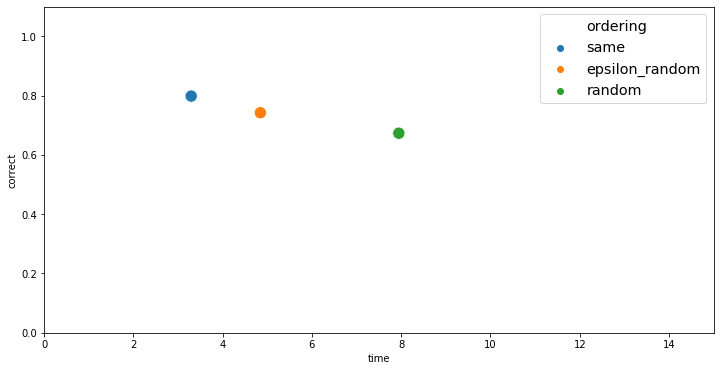

In [8]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=mean_by_ordering,
                     x="time",
                     y="correct",
                     hue='ordering',
                     s=150)
plt.legend(fontsize='x-large')
ax.set(xlim=(0,15),
      ylim=(0,1.1))

In [9]:
mean_by_ordering_volunteer = data.groupby(['ordering', 'volunteer'],as_index=False)[['time', 'correct']].mean()
mean_by_ordering_volunteer

,ordering,volunteer,time,correct
0,epsilon_random,Angeline,7.470991,0.700000
1,epsilon_random,Arnold,4.570685,0.800000
2,epsilon_random,Cierra,4.391925,0.833333
3,epsilon_random,Gabi,3.630357,0.720000
4,epsilon_random,Lauren,2.105607,0.763889
5,epsilon_random,MarinaT_try2,4.790977,0.717241
6,epsilon_random,Marta,5.264598,0.966667
7,epsilon_random,Savannah,5.453575,0.633333
8,epsilon_random,Taylor K,6.235531,0.697674
9,epsilon_random,Vinith,7.659062,0.709091


[(0, 1.1), (0, 15)]

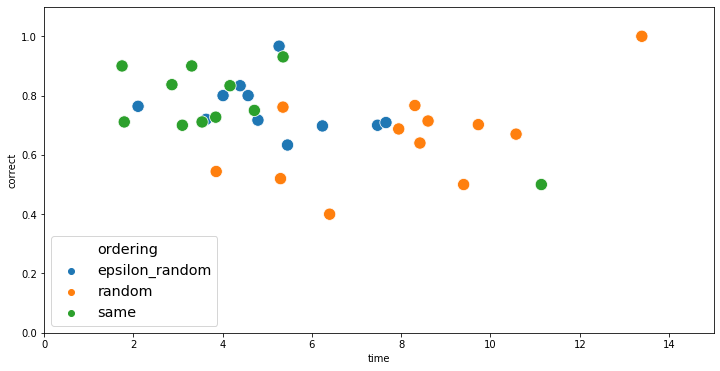

In [10]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=mean_by_ordering_volunteer,
                     x="time",
                     y="correct",
                     hue='ordering',
                     s=150)
plt.legend(fontsize='x-large')
ax.set(xlim=(0,15),
      ylim=(0,1.1))